# CNN Model Intro with MNIST Implementation
### Brief Introduction
This notebook will cover the following two major topics :

#### Understand the basic concepts of CNN model
#### Implement CNN model in realtime using MNIST dataset

## Understand the basic concepts of CNN model :

Mankind is an awesome natural machine and is capable of looking at multiple images every second and process them without realizing how the processing is done. But same is not with machines.

The first step in image processing is to understand, how to represent an image so that the machine can read it?

Every image is an cumulative arrangement of dots (a pixel) arranged in a special order. If you change the order or color of a pixel, the image would change as well.

![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-9-15-21-pm.png)

Three basic components to define a basic convolutional neural network.

### The Convolutional Layer
### The Pooling layer
### The Output layer

Let's see each of them in detail

### The Convolutional Layer :

In this layer if we have an image of size 6*6. We define a weight matrix which extracts certain features from the images*

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28010254/conv1.png)

We have initialized the weight as a 3*3 matrix. This weight shall now run across the image such that all the pixels are covered at least once, to give a convolved output. The value 429 above, is obtained by the adding the values obtained by element wise multiplication of the weight matrix and the highlighted 3*3 part of the input image.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28011851/conv.gif)

The 6*6 image is now converted into a 4*4 image.  Think of weight matrix like a paint brush painting a wall. The brush first paints the wall horizontally and then comes down and paints the next row horizontally. Pixel values are used again when the weight matrix moves along the image. This basically enables parameter sharing in a convolutional neural network.

Let's see how this looks like in a real image.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28132834/convimages.png)


* The weight matrix behaves like a filter in an image, extracting particular information from the original image matrix.
* A weight combination might be extracting edges, while another one might a particular color, while another one might just blur the unwanted noise.
* The weights are learnt such that the loss function is minimized and extract features from the original image which help the network in correct prediction.
* When we use multiple convolutional layers, the initial layer extract more generic features,and as network gets deeper the features get complex.

Let us understand some concepts here before we go further deep

#### What is Stride?

As shown above above, the filter or the weight matrix we moved across the entire image moving one pixel at a time.If this is a hyperparameter to move weight matrix 1 pixel at a time across image it is called as stride of 1. Let us see for stride of 2 how it looks.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28090227/stride1.gif)


As you can see the size of image keeps on reducing as we increase the stride value.

Padding the input image with zeros across it solves this problem for us. We can also add more than one layer of zeros around the image in case of higher stride values.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28093553/zero-padding.png)

We can see how the initial shape of the image is retained after we padded the image with a zero. This is known as same padding since the output image has the same size as the input.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28094927/padding.gif)

This is known as same padding (which means that we considered only the valid pixels of the input image). The middle 4*4 pixels would be the same. Here we have retained more information from the borders and have also preserved the size of the image.

#### Having Multiple filters & the Activation Map

* The depth dimension of the weight would be same as the depth dimension of the input image.
* The weight extends to the entire depth of the input image.
* Convolution with a single weight matrix would result into a convolved output with a single depth dimension. In case of multiple filters all have same dimensions applied together.
* The output from the each filter is stacked together forming the depth dimension of the convolved image.

Suppose we have an input image of size 32*32*3. And we apply 10 filters of size 5*5*3 with valid padding. The output would have the dimensions as 28*28*10.

You can visualize it as:

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28113904/activation-map.png)

This activation map is the output of the convolution layer.

### The Pooling Layer

If images are big in size, we would need to reduce the no.of trainable parameters.For this we need to use pooling layers between convolution layers. Pooling is used for reducing the spatial size of the image and is implemented independently on each depth dimension resulting in no change in image depth. Max pooling is the most popular form of pooling layer.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28022816/maxpool.png)

Here we have taken stride as 2, while pooling size also as 2. The max operation is applied to each depth dimension of the convolved output. As you can see, the 4*4 convolved output has become 2*2 after the max pooling operation.

Let's see how max pooling looks on a real image.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28133544/pooling.png)

In the above image we have taken a convoluted image and applied max pooling on it which resulted in still retaining the image information that is a car but if we closely observe the dimensions of the image is reduced to half which basically means we can reduce the parameters to a great number.

There are other forms of pooling like average pooling, L2 norm pooling.

#### Output dimensions

It is tricky at times to understand the input and output dimensions at the end of each convolution layer. For this we will use three hyperparameters that would control the size of output volume.

1. No of Filter: The depth of the output volume will be equal to the number of filter applied.The depth of the activation map will be equal to the number of filters.

2. Stride - When we have a stride of one we move across and down a single pixel. With higher stride values, we move large number of pixels at a time and hence produce smaller output volumes.

3. Zero padding - This helps us to preserve the size of the input image. If a single zero padding is added, a single stride filter movement would retain the size of the original image.

We can apply a simple formula to calculate the output dimensions.

The spatial size of the output image can be calculated as( [W-F+2P]/S)+1.
where, W is the input volume size,
       F is the size of the filter,
       P is the number of padding applied
       S is the number of strides.
       
Let us take an example of an input image of size 64*64*3, we apply 10 filters of size 3*3*3, with single stride and no zero padding.

Here W=64, F=3, P=0 and S=1. The output depth will be equal to the number of filters applied i.e. 10.

The size of the output volume will be ([64-3+0]/1)+1 = 62. Therefore the output volume will be 62*62*10.

### The Output layer
* With no of layers of convolution and padding, we need the output in the form of a class.
* To generate the final output we need to apply a fully connected layer to generate an output equal to the number of classes we need.
* Convolution layers generate 3D activation maps while we just need the output as whether or not an image belongs to a particular class.
* The Output layer has a loss function like categorical cross-entropy, to compute the error in prediction. Once the forward pass is complete the backpropagation begins to update the weight and biases for error and loss reduction.

### Summary:
* Pass an input image to the first convolutional layer. The convoluted output is obtained as an activation map. The filters applied in the convolution layer extract relevant features from the input image to pass further.
* Each filter shall give a different feature to aid the correct class prediction. In case we need to retain the size of the image, we use same padding(zero padding), otherwise valid padding is used since it helps to reduce the number of features.
* Pooling layers are then added to further reduce the number of parameters
* Several convolution and pooling layers are added before the prediction is made. Convolutional layer help in extracting features. As we go deeper in the network more specific features are extracted as compared to a shallow network where the features extracted are more generic.
* The output layer in a CNN as mentioned previously is a fully connected layer, where the input from the other layers is flattened and sent so as the transform the output into the number of classes as desired by the network.
* The output is then generated through the output layer and is compared to the output layer for error generation. A loss function is defined in the fully connected output layer to compute the mean square loss. The gradient of error is then calculated.
* The error is then backpropagated to update the filter(weights) and bias values.
* One training cycle is completed in a single forward and backward pass.

### Implement CNN model in realtime using Hand digit MNIST dataset

Hand digit-MNIST is a dataset of Digits images—consisting of a training set of 20,000 examples and a test set of 1,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

### Data Description

* Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.
* Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.
* The training and test data sets have 785 columns.
* The first column consists of the class labels (see above), and represents the digit
* The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.



## About the Dataset
> * MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision.   
> * Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms.
> * As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

## Task
> * To correctly identify digits from a dataset of tens of thousands of handwritten images in the test dataset

# Libraries

In [9]:
# for numerical analysis
import numpy as np
# to store and process in a dataframe
import pandas as pd

# for ploting graphs
import matplotlib.pyplot as plt
# advancec ploting
import seaborn as sns

# image processing
import matplotlib.image as mpimg

# train test split
from sklearn.model_selection import train_test_split
# model performance metrics
from sklearn.metrics import confusion_matrix, classification_report

# utility functions
from tensorflow.keras.utils import to_categorical
# sequential model
from tensorflow.keras.models import Sequential
# layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

ModuleNotFoundError: No module named 'seaborn'

# Data

In [ ]:
# import train and test dataset
train = pd.read_csv("/content/sample_data/mnist_train_small.csv")
test = pd.read_csv("/content/sample_data/mnist_test.csv")

In [ ]:
# training dataset
train.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
len(test.index)

9999

In [ ]:
# test dataset
test.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.rename(columns={'6': 'Label'}, inplace=True)
test.rename(columns={'7': 'Label'}, inplace=True)

In [ ]:
test.head()

,Label,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# looking for missing values
print(train.isna().sum().sum())
print(test.isna().sum().sum())

0
0


# EDA

### Label count

In [ ]:
train['Label'].value_counts()

,count
Label,
1,2243
7,2126
6,2038
9,2023
3,2021
2,1989
0,1962
4,1924
8,1912


In [ ]:
count_num = [x for x in train['Label'].value_counts().sort_index()]
count_num


[1962, 2243, 1989, 2021, 1924, 1761, 2038, 2126, 1912, 2023]

<ipython-input-11-285a7cc3ef98>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(count_num, palette='Dark2')


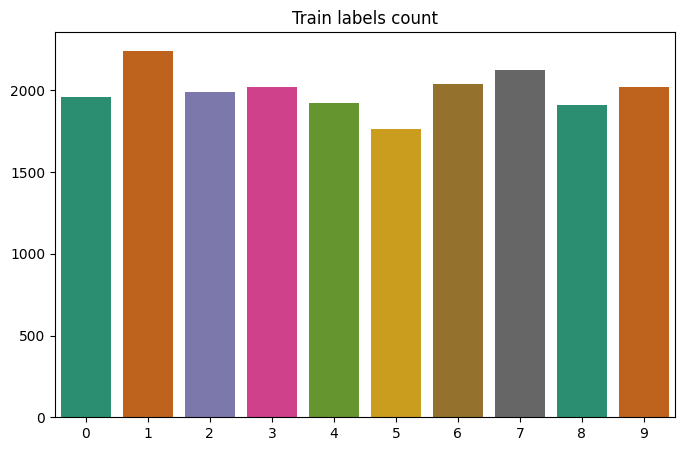

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(count_num, palette='Dark2')
plt.title('Train labels count')
plt.show()

<ipython-input-12-1a8796f218a7>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, ind+1)
<ipython-input-12-1a8796f218a7>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(row[0])


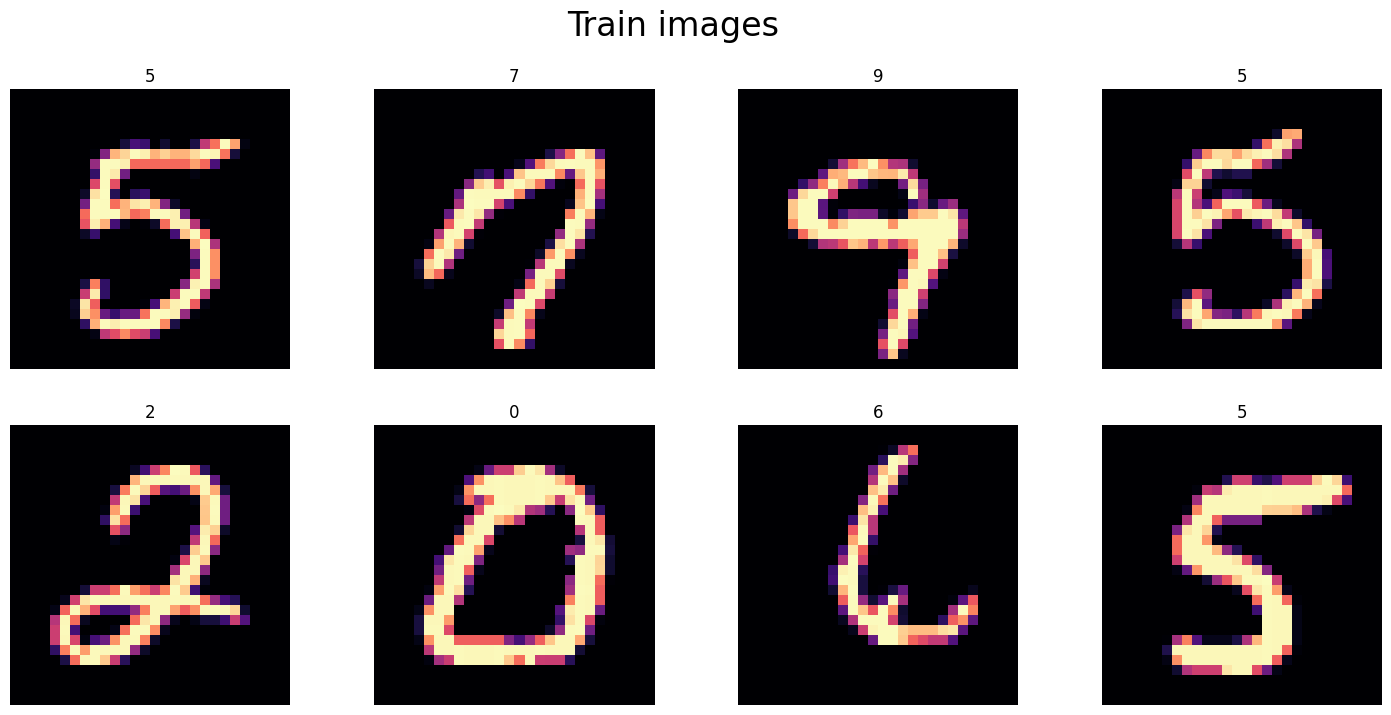

In [ ]:
# first few train images with labels
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in train.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    plt.title(row[0])
    img = row.to_numpy()[1:].reshape(28, 28)
    fig.suptitle('Train images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')

> Test images doesn't have labels  
> We need to create a model to predict them

<ipython-input-13-3566033cd87d>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, ind+1)


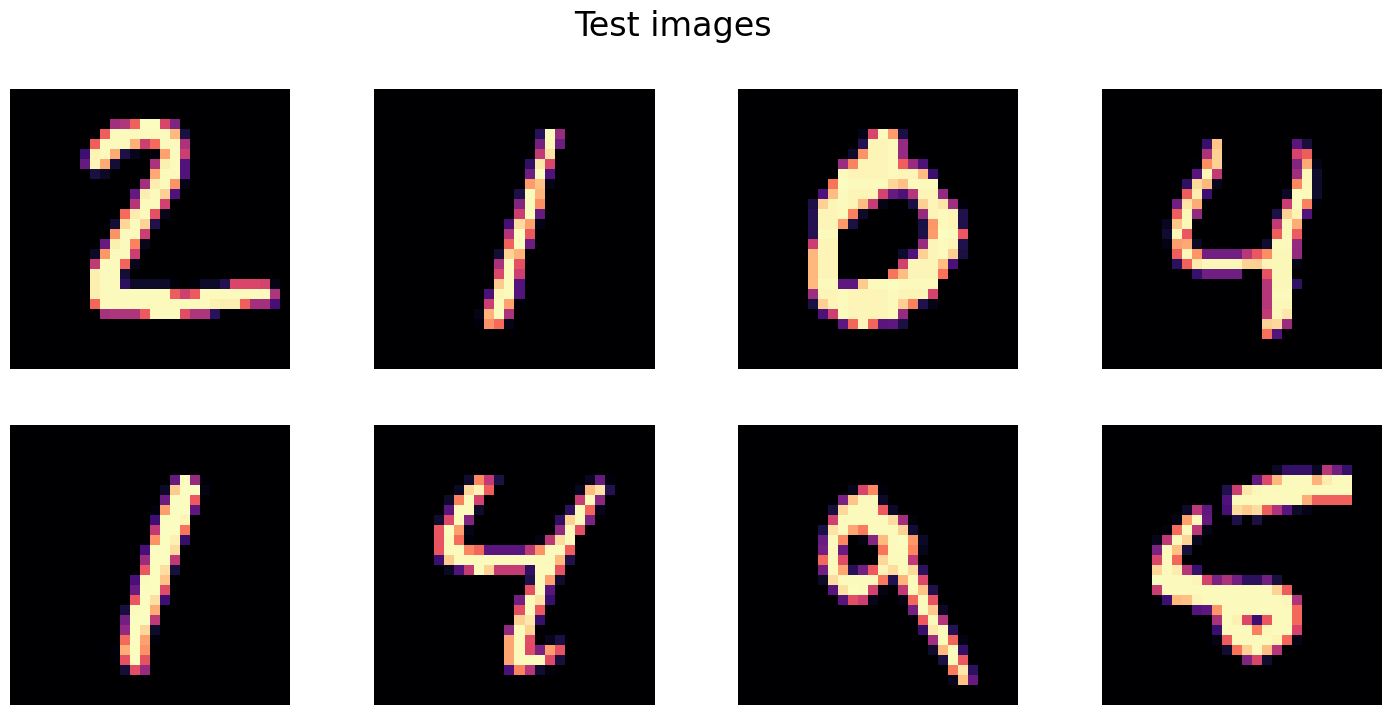

In [ ]:
# first few test images
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in test.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    img = row.to_numpy()[1:].reshape(28, 28)
    fig.suptitle('Test images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')

# Preprocessing

In [ ]:
# split into image and labels and convert to numpy array
X = train.iloc[:, 1:].to_numpy()
y = train['Label'].to_numpy()

# test dataset
X_test = test.iloc[:, 1:].to_numpy()
y_test = test['Label'].to_numpy()

for i in [X, y, X_test, y_test]:
    print(i.shape)

(19999, 784)
(19999,)
(9999, 784)
(9999,)


In [ ]:
# normalize the data
# ==================

X = X / 255.0
X_test = X_test / 255.0

#### Checking the predictive ability of various ML Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X, y)

# Predict on test data
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")


Logistic Regression Accuracy: 0.918091809180918


In [ ]:
from sklearn.svm import SVC

# Initialize the SVM model
svm = SVC()

# Train the model
svm.fit(X, y)

# Predict on test data
y_pred_svm = svm.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")


SVM Accuracy: 0.96999699969997


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100)

# Train the model
rf.fit(X, y)

# Predict on test data
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")


Random Forest Accuracy: 0.9593959395939594


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the k-NN model
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X, y)

# Predict on test data
y_pred_knn = knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"k-NN Accuracy: {accuracy_knn}")


k-NN Accuracy: 0.9594959495949595


SVM model could reach a maximum accuracy of 97%


We will try to improve this accuracy by using CNN and by building a neural network architechture and test our data with this model.  

In [ ]:
# reshape dataset
# ===============

# shape of training and test dataset
print(X.shape)
print(X_test.shape)

# reshape the dataframe to 3x3 matrix with 1 channel grey scale values
X = X.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

# shape of training and test dataset
print(X.shape)
print(X_test.shape)

(19999, 784)
(9999, 784)
(19999, 28, 28, 1)
(9999, 28, 28, 1)


In [ ]:
# utility functions
from tensorflow.keras.utils import to_categorical
# sequential model
from tensorflow.keras.models import Sequential
# layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
# one hot encode target
# =====================

# shape and values of target
print(y.shape)
print(y[0])

# convert Y_train to categorical by one-hot-encoding
y_enc = to_categorical(y, num_classes = 10)

# shape and values of target
print(y_enc.shape)
print(y_enc[0])

(19999,)
5
(19999, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# train test split
# ================

# random seed
random_seed = 101

# train validation split
X_train, X_val, y_train_enc, y_val_enc = train_test_split(X, y_enc, test_size=0.3)

# shape
for i in [X_train, y_train_enc, X_val, y_val_enc]:
    print(i.shape)

(13999, 28, 28, 1)
(13999, 10)
(6000, 28, 28, 1)
(6000, 10)


## Plot images

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


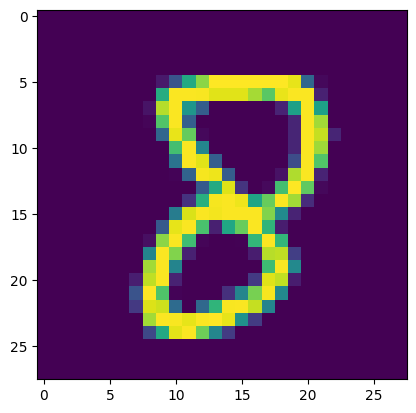

In [ ]:
g = plt.imshow(X_train[0][:,:,0])
print(y_train_enc[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


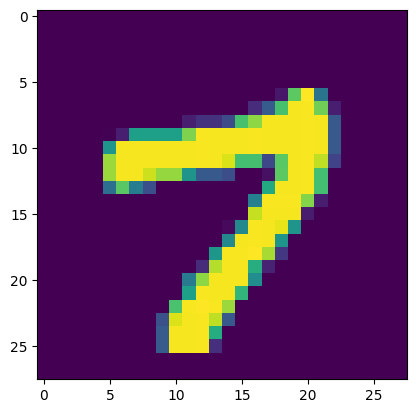

In [ ]:
g = plt.imshow(X_train[9][:,:,0])
print(y_train_enc[9])

# CNN

In [ ]:
# utility functions
from tensorflow.keras.utils import to_categorical
# sequential model
from tensorflow.keras.models import Sequential
# layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

### Model parameters

In [ ]:
INPUT_SHAPE = (28,28,1)
OUTPUT_SHAPE = 10
BATCH_SIZE = 128
EPOCHS = 10
VERBOSE = 1

### Define CNN Model

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Model summary

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

### Model fitting

In [ ]:
history = model.fit(X_train, y_train_enc,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=VERBOSE,
                    validation_split=0.3)

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.5162 - loss: 1.4503 - val_accuracy: 0.9250 - val_loss: 0.2487
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - accuracy: 0.9107 - loss: 0.2977 - val_accuracy: 0.9510 - val_loss: 0.1491
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - accuracy: 0.9423 - loss: 0.1824 - val_accuracy: 0.9652 - val_loss: 0.1033
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 15s 181ms/step - accuracy: 0.9585 - loss: 0.1286 - val_accuracy: 0.9681 - val_loss: 0.0969
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 15s 116ms/step - accuracy: 0.9691 - loss: 0.0983 - val_accuracy: 0.9729 - val_loss: 0.0868
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 166ms/step - accuracy: 0.9745 - loss: 0.0877 - val_accuracy: 0.9745 - val_loss: 0.0805
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - accuracy: 0.9831 - loss: 0.0648 - val_accuracy: 0.9783 - val_loss: 0.0680
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 152ms/step - accuracy: 0.9825 - loss: 0.0554 - val_accur

### Accurayc and loss

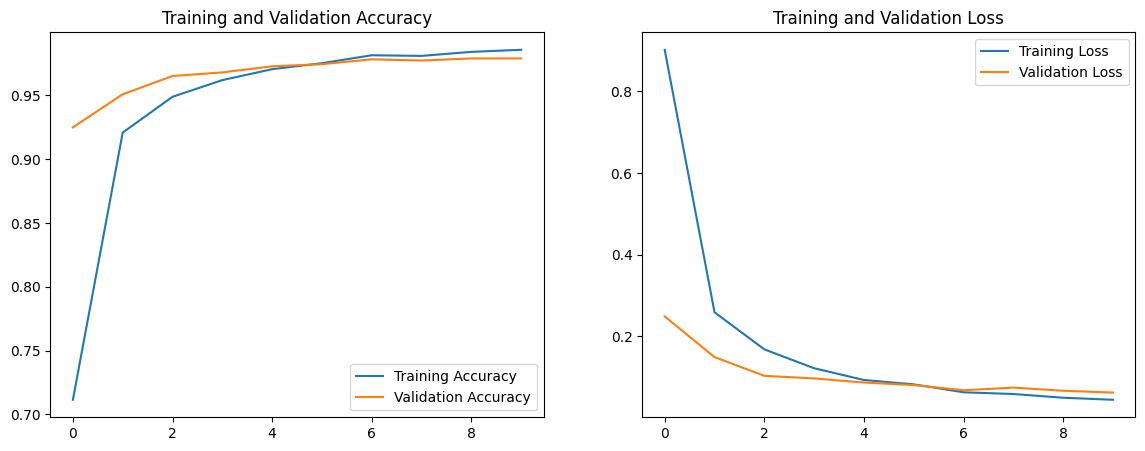

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./loss.png')
plt.show()

### Evaluating on validationa dataset

In [ ]:
# model loss and accuracy on validation set
model.evaluate(X_val, y_val_enc, verbose=1)

188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9778 - loss: 0.0811


[0.06753452867269516, 0.9810000061988831]

In [ ]:
# predicted values
y_pred_enc = model.predict(X_val)

# actual
y_act = [np.argmax(i) for i in y_val_enc]

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step
[1.0198731e-04 1.0614760e-07 2.6230978e-07 1.5416976e-08 4.3098404e-05
 7.4584415e-07 9.9985337e-01 1.9907452e-08 1.6794039e-07 3.4765679e-07]
6


In [ ]:
print(classification_report(y_act, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       619
           1       0.98      0.99      0.99       654
           2       0.97      0.98      0.97       599
           3       0.97      0.98      0.98       610
           4       0.99      0.99      0.99       580
           5       0.99      0.97      0.98       527
           6       0.98      0.99      0.98       615
           7       0.98      0.98      0.98       646
           8       0.99      0.96      0.97       554
           9       0.98      0.98      0.98       596

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



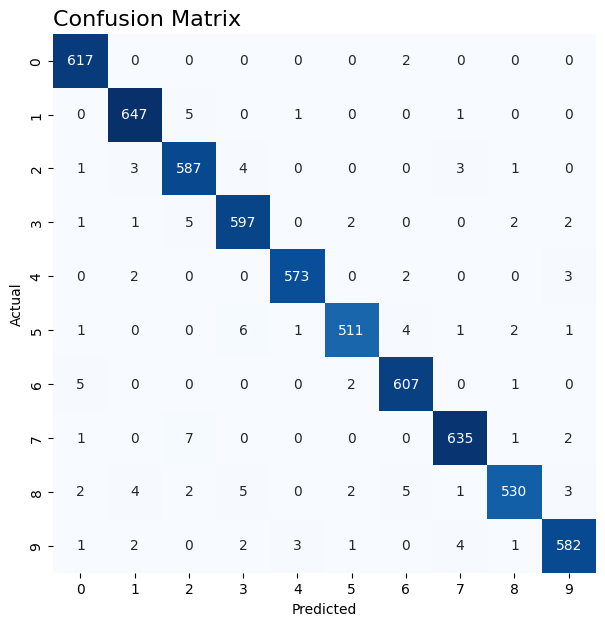

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(y_act, y_pred), annot=True,
            cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix', loc='left', fontsize=16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

### Predicting on test

In [ ]:
# predicted values
y_pred_enc = model.predict(X_test)

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
[2.4079909e-09 2.3551547e-07 9.9999970e-01 4.6285633e-09 3.4621056e-10
 8.6640005e-13 8.5211538e-10 1.3785962e-11 6.5881103e-12 3.5365303e-13]
2


<ipython-input-39-644aa9b41e7e>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 5, ind+1)


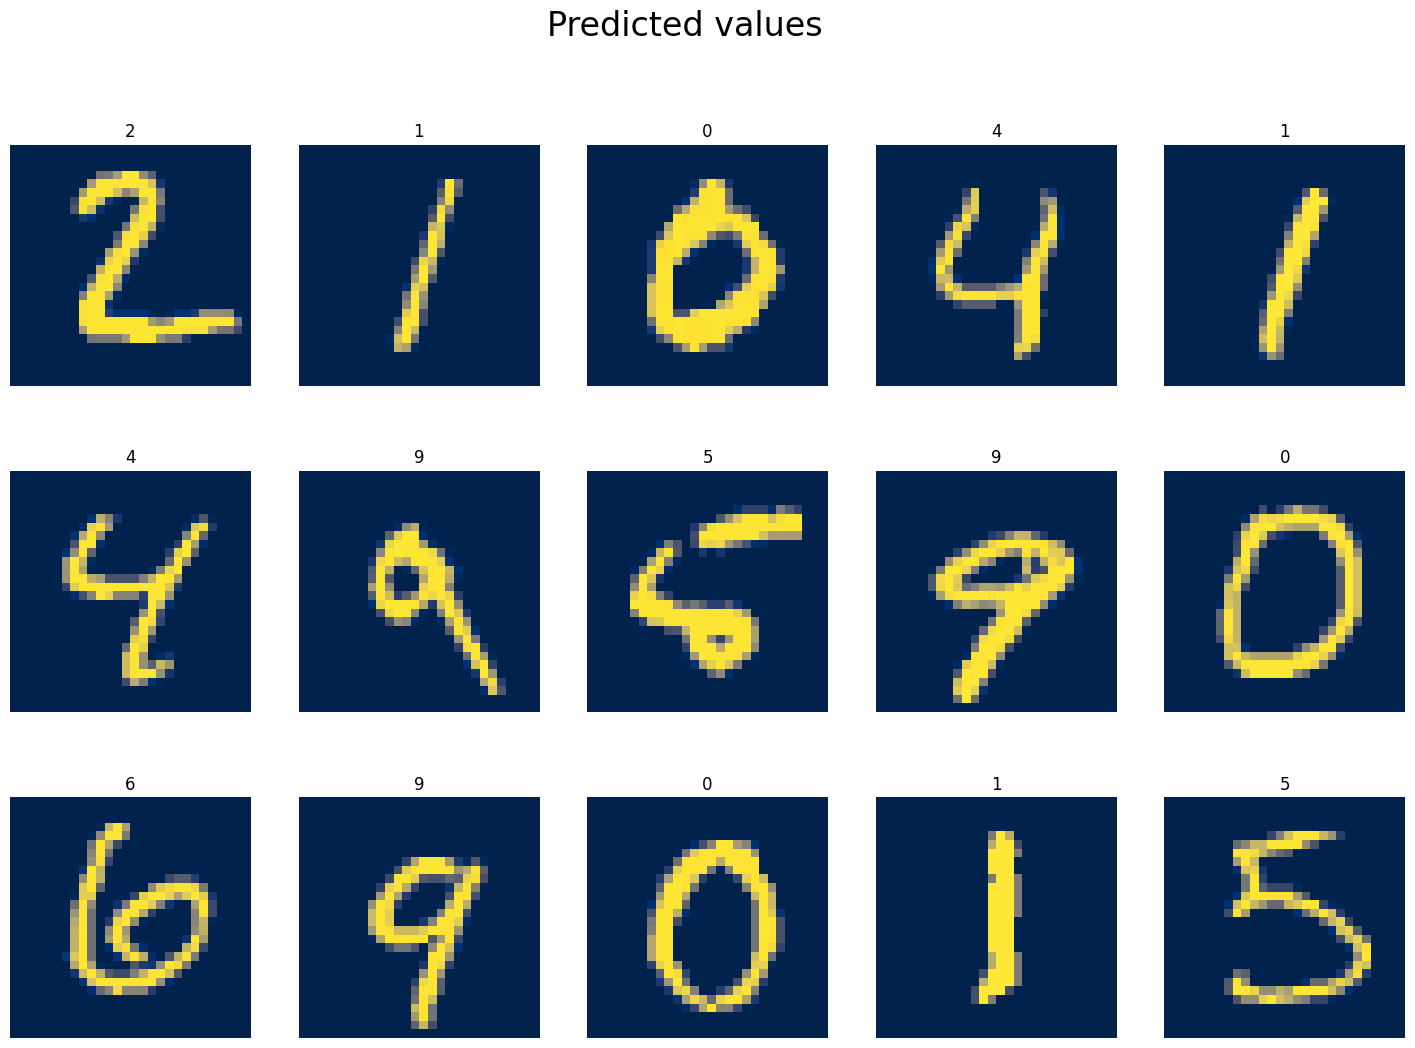

In [ ]:
# predicted targets of each images
# (labels above the images are predicted labels)
fig, ax = plt.subplots(figsize=(18, 12))
for ind, row in enumerate(X_test[:15]):
    plt.subplot(3, 5, ind+1)
    plt.title(y_pred[ind])
    img = row.reshape(28, 28)
    fig.suptitle('Predicted values', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')

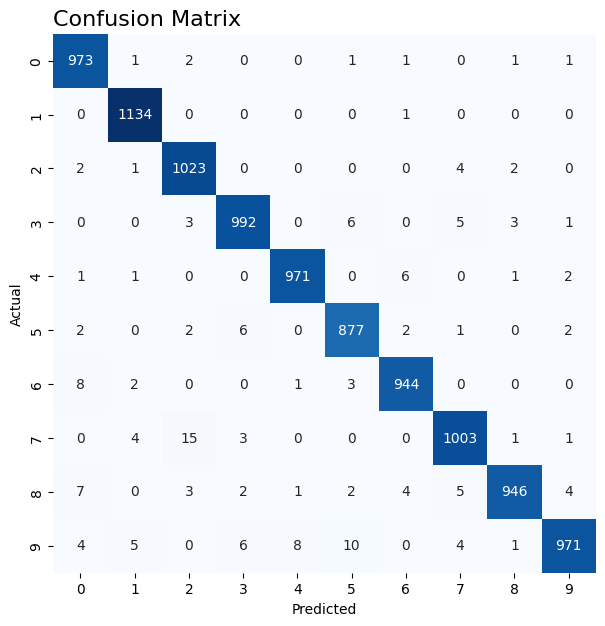

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,
            cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix', loc='left', fontsize=16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1027
           8       0.99      0.97      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98      9999
   macro avg       0.98      0.98      0.98      9999
weighted avg       0.98      0.98      0.98      9999



### Test accuracy is 98%